Import necessary libraries

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from tensorflow import keras
from skimage.transform import resize
from sklearn.utils import shuffle

Fetch the training data

In [10]:
pwd

'C:\\Users\\Pakistan\\Desktop\\NIVEDITHA\\Deep learning course notes\\Deep learning course notes\\9. Capstone project\\hurricane project'

In [11]:
import glob

In [12]:
damage = glob.glob('train_another/damage/*.jpeg')
no_damage = glob.glob('train_another/no_damage/*.jpeg')

In [13]:
damage

['train_another/damage\\-93.6141_30.754263.jpeg',
 'train_another/damage\\-95.01465999999999_29.467540000000003.jpeg',
 'train_another/damage\\-95.01933100000001_29.457503000000003.jpeg',
 'train_another/damage\\-95.01986099999999_29.457293.jpeg',
 'train_another/damage\\-95.04979499999999_30.016185999999998.jpeg',
 'train_another/damage\\-95.05439799999999_30.060171.jpeg',
 'train_another/damage\\-95.05785300000001_30.040259000000002.jpeg',
 'train_another/damage\\-95.06173100000001_30.038172999999997.jpeg',
 'train_another/damage\\-95.06218199999999_29.82831.jpeg',
 'train_another/damage\\-95.06226600000001_29.830283.jpeg',
 'train_another/damage\\-95.06251400000001_30.05518.jpeg',
 'train_another/damage\\-95.06396099999999_30.058753000000003.jpeg',
 'train_another/damage\\-95.06470300000001_29.790514.jpeg',
 'train_another/damage\\-95.06504100000001_29.832346.jpeg',
 'train_another/damage\\-95.06546800000001_29.832415.jpeg',
 'train_another/damage\\-95.06560400000001_29.832156.jpeg'

Fetch the testing data

In [14]:
damage_test = glob.glob('test_another/damage/*.jpeg')
no_damage_test = glob.glob('test_another/no_damage/*.jpeg')

Find the number of images in the Training and Testing set

In [15]:
print(f'Number of images in Training set are\nDamage:{len(damage)}')
print(f'No Damage:{len(no_damage)}')
print(f'Damage test:{len(damage_test)}')
print(f'No Damage test:{len(no_damage_test)}')

Number of images in Training set are
Damage:429
No Damage:403
Damage test:359
No Damage test:399


Store all the images inside a list and create a list with the corresponding labels

For Training set

In [16]:
image = []
label = []

for i in damage:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in no_damage:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

For Testing set

In [17]:
image_test = []
label_test = []

for i in damage:
    img = plt.imread(i)  
    image_test.append(img)
    label_test.append(0)

for i in no_damage:
    img = plt.imread(i) 
    image_test.append(img)
    label_test.append(1)

Shuffle both image list and label list (In both Training and testing set)

In [18]:
image, label = shuffle(image, label, random_state=100)
image_test, label_test = shuffle(image_test, label_test)

In [19]:
len(label_test)

832

In [20]:
len(image_test)

832

Plot a few images from our shuffled list with its corresponding label (Either from training or test set)

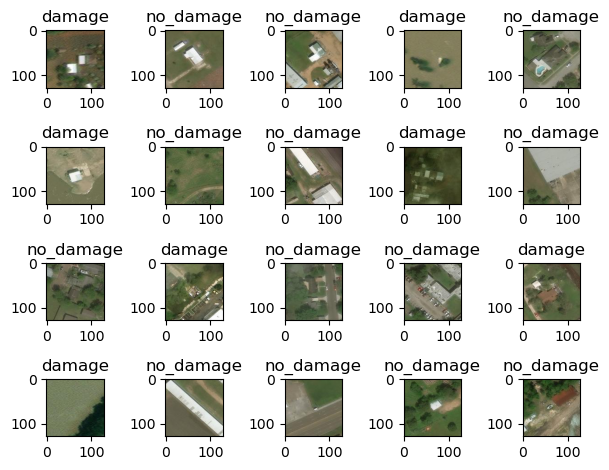

In [21]:
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(image[i])
    plt.title(label[i])
    if label[i]==1:
        plt.title('no_damage')
    else:
        plt.title('damage')
    plt.tight_layout()

Reshape the images both training and testing set

Also reassign them to new variables named X_train and X_test and convert them to a numpy array

In [22]:
Xtrain = []
for i in image:
    Xtrain.append(resize(i,(224,224,3)))
Xtrain = np.array(Xtrain)

In [23]:
Xtest = []
for i in image:
    Xtest.append(resize(i, (224,224,3)))
Xtest = np.array(Xtest)

create numpy arrays named y_train and y_test from our training and testing label lists we created earlier

In [24]:
ytrain = np.array(label)
ytest = np.array(label_test)

Plot some of our reshaped images

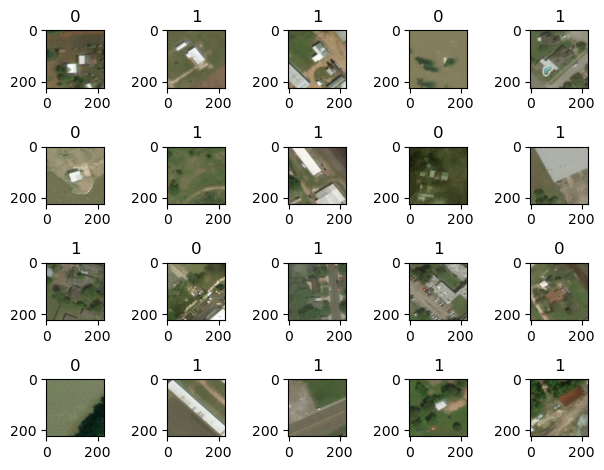

In [25]:
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(Xtrain[i])
    plt.title(label[i])
    plt.tight_layout()

Check the shape of X_train and X_test and y_train and y_test

In [26]:
print(f"Shape of Xtrain is:", Xtrain.shape)
print(f"Shape of Xtest is:", Xtest.shape)
print(f"Shape of ytrain is:", ytrain.shape)
print(f"Shape of ytest is:", ytest.shape)

Shape of Xtrain is: (832, 224, 224, 3)
Shape of Xtest is: (832, 224, 224, 3)
Shape of ytrain is: (832,)
Shape of ytest is: (832,)


Create a keras Sequential model with convolution layers, Flatten and Hidden layers

In [27]:
model= keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')        
])

C:\Users\Pakistan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [28]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Check the summary of our model

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,972,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,977,185 (22.80 MB)

 Trainable params: 5,977,185 (22.80 MB)

 Non-trainable params: 0 (0.00 B)

Train the model.

In [30]:
model.fit(Xtrain, ytrain, epochs = 15, validation_split = 0.1)

Epoch 1/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 390ms/step - accuracy: 0.5047 - loss: 1.1513 - val_accuracy: 0.6429 - val_loss: 0.6754
Epoch 2/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - accuracy: 0.6374 - loss: 0.6664 - val_accuracy: 0.5952 - val_loss: 0.6598
Epoch 3/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 357ms/step - accuracy: 0.6781 - loss: 0.6180 - val_accuracy: 0.6667 - val_loss: 0.6365
Epoch 4/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 358ms/step - accuracy: 0.7372 - loss: 0.5730 - val_accuracy: 0.6310 - val_loss: 0.6243
Epoch 5/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 354ms/step - accuracy: 0.8160 - loss: 0.4606 - val_accuracy: 0.6190 - val_loss: 0.7520
Epoch 6/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 357ms/step - accuracy: 0.8745 - loss: 0.3462 - val_accuracy: 0.6548 - val_loss: 0.7184
Epoch 7/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 351ms/step - accuracy: 0.8977 - loss: 0.2997 - val_accuracy: 0.6548 - val_loss: 0.7644
Epoch 8/15
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 351ms/step - accuracy: 0.9057 - loss: 0.2680 - val_accuracy:

Evaluate the model

In [31]:
model.evaluate(Xtrain, ytrain)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9943 - loss: 0.0320


[0.14746452867984772, 0.9627403616905212]

Make predictions with X_test

In [32]:
ypred = model.predict(Xtest)

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step


Use np.argmax to fetch indices of max element of the array

Store the values in a list

In [33]:
ypred = ypred.argmax(axis=1)

Plot X_test with label from our prediction

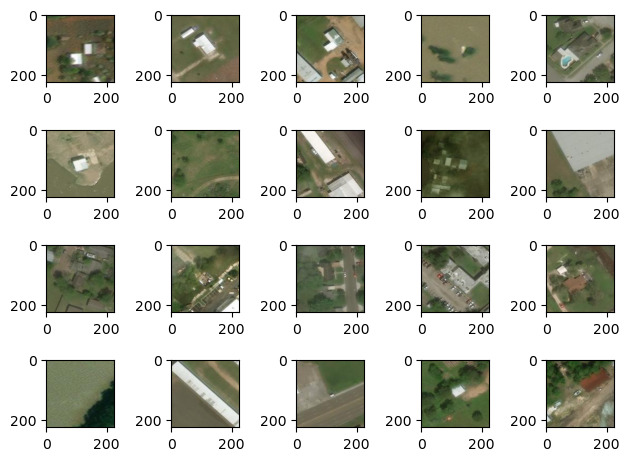

In [34]:
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(Xtest[i])
    plt.tight_layout()

Visualise confusion matrix on a heatmap

In [ ]:
from sklear.metrics import ConfusionMatrixDisplay

In [ ]:
ConfusionMatrixDisplay.from_predictions(ytest, ypred)